# **Shopify Data Science Intern Challenge**

### **Question 1**

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

**Data Analysis**

Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

sns.set_theme(style = 'ticks')

import warnings
warnings.filterwarnings('ignore')

In [2]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
data = pd.read_csv("/content/data.csv",parse_dates=['created_at'], date_parser=dateparse)

In [3]:
def data_description(data):
  print("Dataset is of size {} and ({},{}) containing {} rows and {} columns \n".format(data.size,
                                                                                len(data),
                                                                                len(data.columns),
                                                                                len(data),
                                                                                len(data.columns)))

In [4]:
def plot_normal_dist(data):
  def normal_dist(data , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((data-mean)/sd)**2)
    return prob_density
 
  mean = data.order_amount.mean()
  sd = data.order_amount.std()

  sorted_data = data.order_amount.sort_values().reset_index()
  
  pdf = normal_dist(sorted_data,mean,sd)
 
  plt.figure(figsize=(15, 7.5))
  plt.title("Distribution of order_amount", fontsize = 20, fontweight = 'bold')
  plt.plot(sorted_data,pdf , color = 'red',linewidth = 3)
  plt.xlabel('Data points')
  plt.ylabel('Probability Density')

In [5]:
data.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 02:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [6]:
data.info

<bound method DataFrame.info of       order_id  shop_id  ...  payment_method          created_at
0            1       53  ...            cash 2017-03-13 12:36:56
1            2       92  ...            cash 2017-03-03 17:38:52
2            3       44  ...            cash 2017-03-14 04:23:56
3            4       18  ...     credit_card 2017-03-26 12:43:37
4            5       18  ...     credit_card 2017-03-01 04:35:11
...        ...      ...  ...             ...                 ...
4995      4996       73  ...           debit 2017-03-30 13:47:17
4996      4997       48  ...            cash 2017-03-16 20:36:16
4997      4998       56  ...            cash 2017-03-19 05:42:42
4998      4999       60  ...     credit_card 2017-03-16 14:51:18
4999      5000       44  ...           debit 2017-03-18 15:48:18

[5000 rows x 7 columns]>

In [7]:
data_description(data)

Dataset is of size 35000 and (5000,7) containing 5000 rows and 7 columns 



In [8]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [9]:
print("The given data contains data from {} to {}".format(data['created_at'].min(),data['created_at'].max()))

The given data contains data from 2017-03-01 00:08:09 to 2017-03-30 23:55:35


Checking if the data cosists of null data or not

In [10]:
data.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

The data doesn't contain any null poinnts making sure the data is clear

In [11]:
round(data.order_amount.mean(),2)

3145.13

Since the AOV is the sum order amount per total number of orders.

We can see that indeed the AOV is $3145.13

Since the average is high given that we know these shops are selling sneakers, a relatively affordable item, the data may cosist of some outliers.

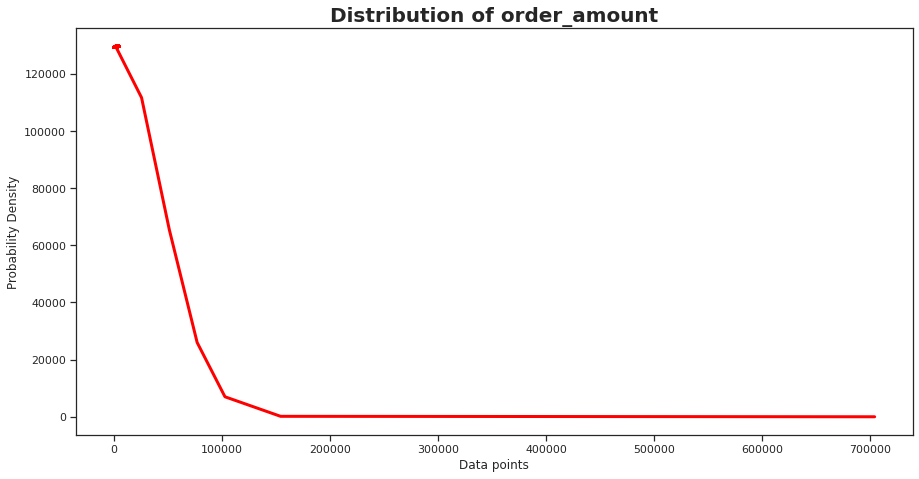

In [12]:
plot_normal_dist(data)

As in the above normal distribution it is clear that the data is left skewed and hence the mean of the data is cominng too high. So let us plot the data and detect what could be the cause of skewness.

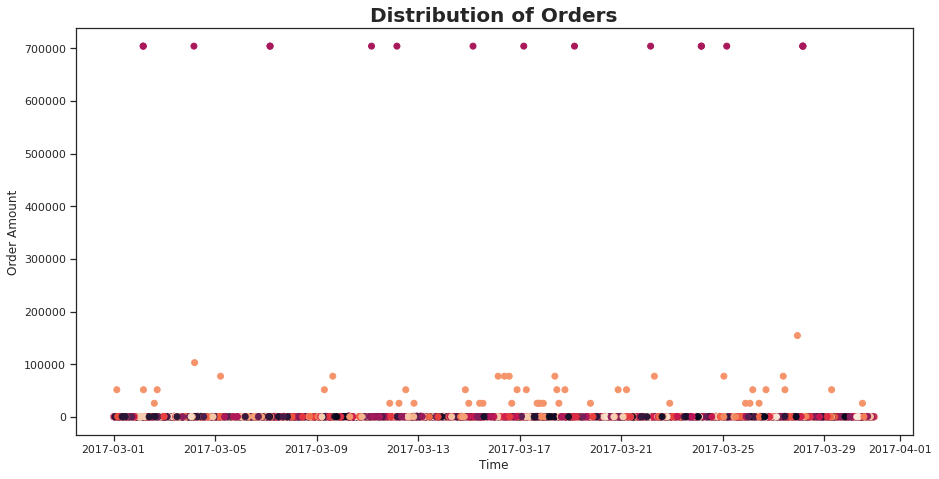

In [13]:
plt.figure(figsize=(15, 7.5))
plt.title("Distribution of Orders", fontsize = 20, fontweight = 'bold')
plt.scatter(data.created_at,data.order_amount,c = data.shop_id)
plt.xlabel('Time',fontsize = 12)
plt.ylabel('Order Amount',fontsize = 12)
plt.show()

In the above image it is clear that there are few outlies in the data causing the data to be skewed and causing the mean to rise.
Let us furthur scrutinize to see what could be the cause of these.

In [14]:
data[data['order_amount']>20000].shop_id.unique()

array([42, 78])

On further scrutiny we found that the shop id's 42 and 78 are the reason of the outliers.

In [15]:
data[data['shop_id'] == 42].sort_values(by = 'order_amount',ascending = False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
4868,4869,42,607,704000,2000,credit_card,2017-03-22 04:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 04:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 04:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00


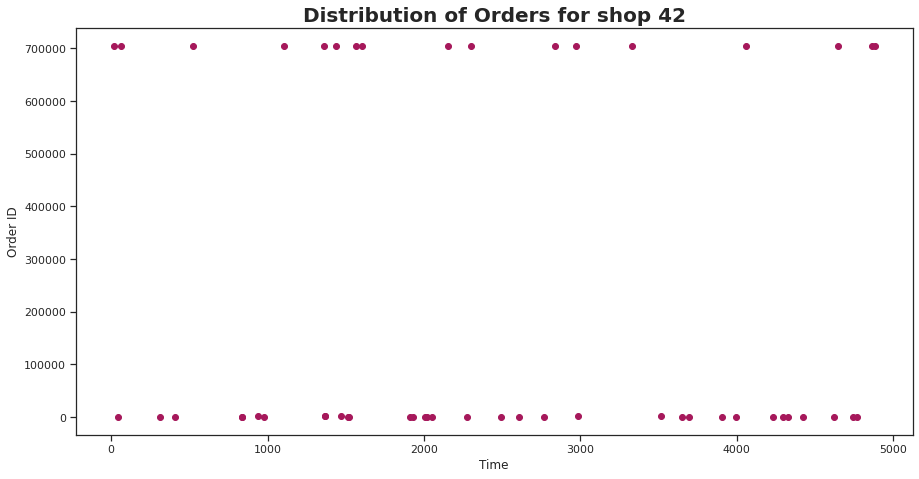

In [16]:
plt.figure(figsize=(15, 7.5))
plt.title("Distribution of Orders for shop 42", fontsize = 20, fontweight = 'bold')
plt.scatter(data[data['shop_id'] == 42].order_id,data[data['shop_id'] == 42].order_amount,c = '#a6185b')
plt.xlabel('Time',fontsize = 12)
plt.ylabel('Order ID',fontsize = 12)
plt.show()

For Shop ID 42, we see that there are multiple orders of amount $704000 and 2000 items. So it is one of the posiiblity for the skewess of the data and increase in the mean.

In [17]:
data[data['shop_id'] == 78].sort_values(by = 'order_amount',ascending = False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
2492,2493,78,834,102900,4,debit,2017-03-04 04:37:34
1259,1260,78,775,77175,3,credit_card,2017-03-27 09:27:20
3724,3725,78,766,77175,3,credit_card,2017-03-16 14:13:26
2906,2907,78,817,77175,3,debit,2017-03-16 03:45:46
2690,2691,78,962,77175,3,debit,2017-03-22 07:33:25
2564,2565,78,915,77175,3,debit,2017-03-25 01:19:35
4192,4193,78,787,77175,3,credit_card,2017-03-18 09:25:32
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35
3403,3404,78,928,77175,3,debit,2017-03-16 09:45:05


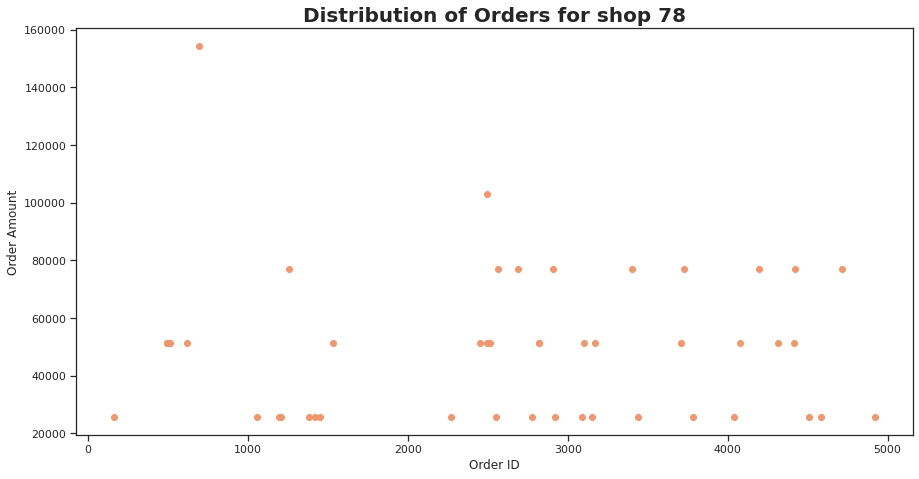

In [18]:
plt.figure(figsize=(15, 7.5))
plt.title("Distribution of Orders for shop 78", fontsize = 20, fontweight = 'bold')
plt.scatter(data[data['shop_id'] == 78].order_id,data[data['shop_id'] == 78].order_amount,c = '#f5956a')
plt.xlabel('Order ID',fontsize = 12)
plt.ylabel('Order Amount',fontsize = 12)
plt.show()

For Shop ID 78, we see that there are sellig very expensive sneakers and also causing the skewness of data and icreasing the mean.

In [19]:
data.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

For the better evaluation of the data we can use the 50 percentile of the order amount or to be exact the MOV(Median Order Value) as it will help to know at what order amount the data is divided equally making it to be a better way to evaluate this data.